 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = "{:,.4f}".format

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Assign the whale_returns path
whale_path = Path("Resources/whale_returns.csv")

# Reading whale returns, sorting index by ascending and manually verifying that index has been sorted
whale_returns = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index(ascending=True, inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.0013,-0.0050,-0.0005,-0.0066
2015-03-04,0.0022,0.0032,-0.0025,0.0042
2015-03-05,0.0040,0.0041,0.0024,0.0067
2015-03-06,-0.0079,-0.0036,-0.0085,-0.0131


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls and verify there are no more nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Assign algo_path
algo_path = Path("Resources/algo_returns.csv")

# Reading algorithmic returns, sorting index by ascending and manually verifying that index has been sorted
algo_returns = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.sort_index(ascending=True, inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.0017,NaN
2014-05-29,0.0040,NaN
2014-05-30,0.0045,NaN
2014-06-02,0.0057,NaN
2014-06-03,0.0053,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls and verify there are no more nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Assign the sp60_path
sp60_path = Path("Resources/sp_tsx_history.csv")

In [9]:
# Reading sp60, sorting index by ascending and manually verifying that index has been sorted
sp60_close = pd.read_csv(sp60_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp60_close.sort_index(ascending=True, inplace=True)
sp60_close.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp60_close.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp60_close["Close"] = sp60_close["Close"].str.replace('$', '')
sp60_close["Close"] = sp60_close["Close"].str.replace(',', '')
sp60_close["Close"] = sp60_close["Close"].astype('float64')
sp60_close.head()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,"12,370.1900"
2012-10-02,"12,391.2300"
2012-10-03,"12,359.4700"
2012-10-04,"12,447.6800"
2012-10-05,"12,418.9900"


In [12]:
# Calculate Daily Returns
sp60_returns = sp60_close.pct_change()

In [13]:
# Drop nulls and verify there are no more nulls
sp60_returns.dropna(inplace=True)
sp60_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp60_returns.columns = ["S&P TSX"]
sp60_returns.head()

,S&P TSX
Date,
2012-10-02,0.0017
2012-10-03,-0.0026
2012-10-04,0.0071
2012-10-05,-0.0023
2012-10-09,-0.0117


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [47]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_returns, algo_returns, sp60_returns], axis="columns", join="inner")
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.0013,-0.0050,-0.0005,-0.0066,-0.0019,-0.0009,-0.0085
2015-03-04,0.0022,0.0032,-0.0025,0.0042,-0.0086,0.0024,-0.0034
2015-03-05,0.0040,0.0041,0.0024,0.0067,-0.0010,0.0043,0.0013
2015-03-06,-0.0079,-0.0036,-0.0085,-0.0131,-0.0050,-0.0115,-0.0100
2015-03-09,0.0006,0.0042,0.0058,-0.0017,-0.0054,0.0013,-0.0066


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

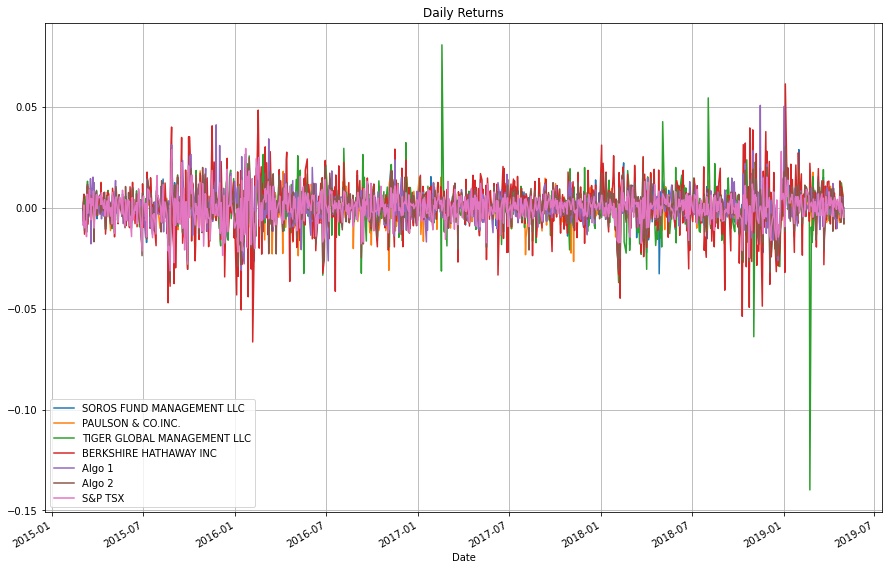

In [16]:
# Plot daily returns of all portfolios
portfolio_returns.plot(figsize=(15, 10), title="Daily Returns", grid=True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

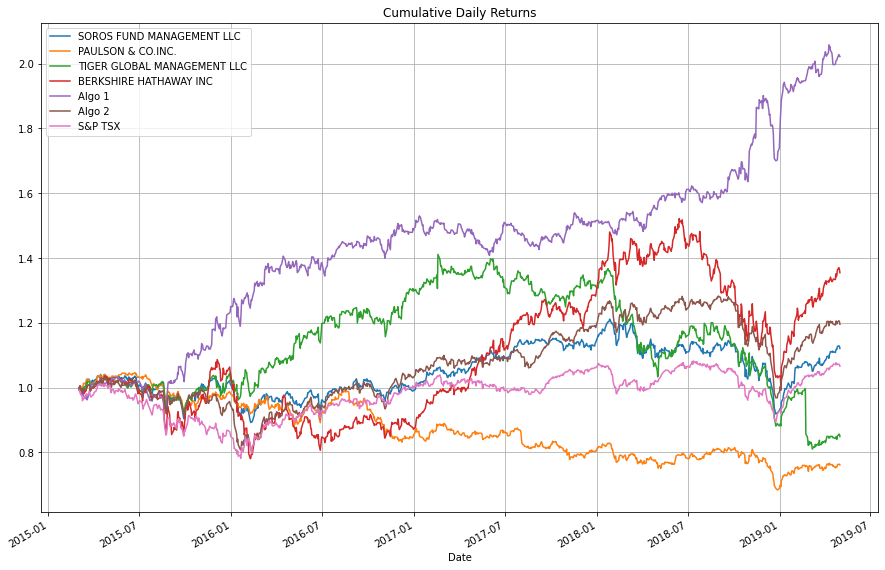

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(15, 10), title="Cumulative Daily Returns", grid=True)


### Cumulative Returns Analysis
For the time period; Four portfolios outperformed the S&P TSX. These include Soros Fund, Algo 2, Berkshire Hathaway and Algo 1 at the top. All four portfolios outperformed the S&P TSX, but the Algo 1 portfolio outperformed the S&P by almost 100%. This makes me greatly look forward to building a trading bot ;)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

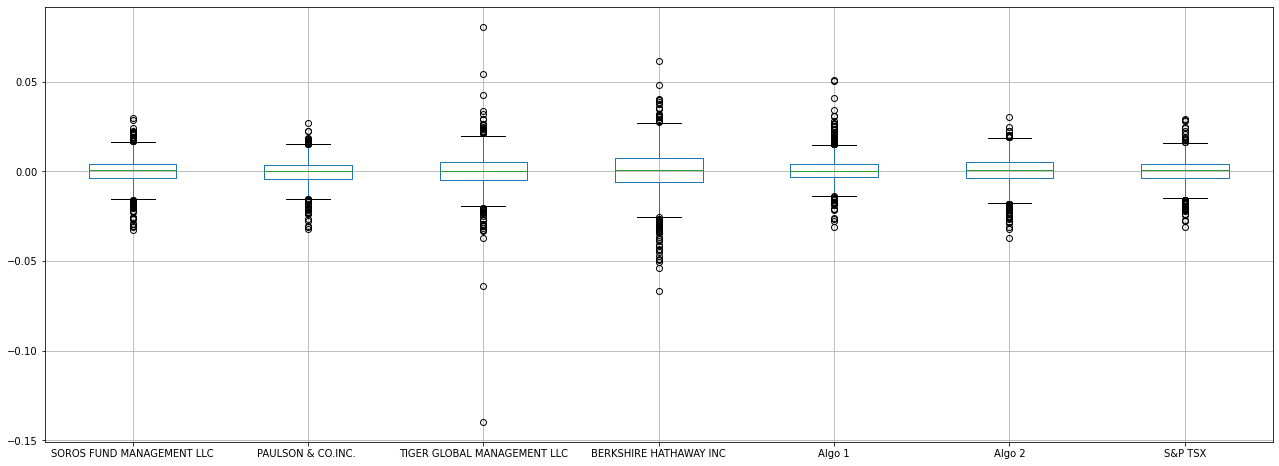

In [18]:
# Box plot to visually show risk
portfolio_returns.boxplot(figsize=(22,8))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
portfolio_returns.std()

SOROS FUND MANAGEMENT LLC     0.0078
PAULSON & CO.INC.             0.0070
TIGER GLOBAL MANAGEMENT LLC   0.0109
BERKSHIRE HATHAWAY INC        0.0128
Algo 1                        0.0076
Algo 2                        0.0083
S&P TSX                       0.0070
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Determine which portfolios are riskier than the S&P TSX 60
# Initialise a dictionary to hold key value pairs of portfolio and corresponding std
portfolio_dict = {}
sp_tsx_std = portfolio_returns["S&P TSX"].std()

# Loop through the portfolios and append to dictionary
for column in portfolio_returns.columns:
    key, value = column, portfolio_returns[column].std()
    portfolio_dict[key] = value
    
# Print the S&P TSX standard deviation as a benchmark
print (f"The S&P TSX has an std of {round(sp_tsx_std, 4)}")
    
# Loop through dictionary to check which portfolios have a higher std than S&P TSX and print corresponding
# key, value pairs
for key, value in portfolio_dict.items():
    if value > sp_tsx_std:
        print (f"{key} with an std of {round(float(value), 4)} is a riskier portfolio than the S&P TSX")


The S&P TSX has an std of 0.007
SOROS FUND MANAGEMENT LLC with an std of 0.0078 is a riskier portfolio than the S&P TSX
TIGER GLOBAL MANAGEMENT LLC with an std of 0.0109 is a riskier portfolio than the S&P TSX
BERKSHIRE HATHAWAY INC with an std of 0.0128 is a riskier portfolio than the S&P TSX
Algo 1 with an std of 0.0076 is a riskier portfolio than the S&P TSX
Algo 2 with an std of 0.0083 is a riskier portfolio than the S&P TSX


--------------------------
## Analysis
Out of the six portfolios; Five of them have a higher standard deviation than the S&P TSX, and are therefore riskier. 
The only portfolio that is not riskier than the S&P TSX is Paulson & Co. As you can see in the plotted cumulative returns above, Paulson & Co were the worst performing portfolio of the time period. They were also one of only two portfolios that ended the time period with negative returns.

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = portfolio_returns.std() * np.sqrt(252)
ann_std

SOROS FUND MANAGEMENT LLC     0.1243
PAULSON & CO.INC.             0.1108
TIGER GLOBAL MANAGEMENT LLC   0.1728
BERKSHIRE HATHAWAY INC        0.2036
Algo 1                        0.1205
Algo 2                        0.1322
S&P TSX                       0.1117
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

Text(0, 0.5, 'Rolling STD')

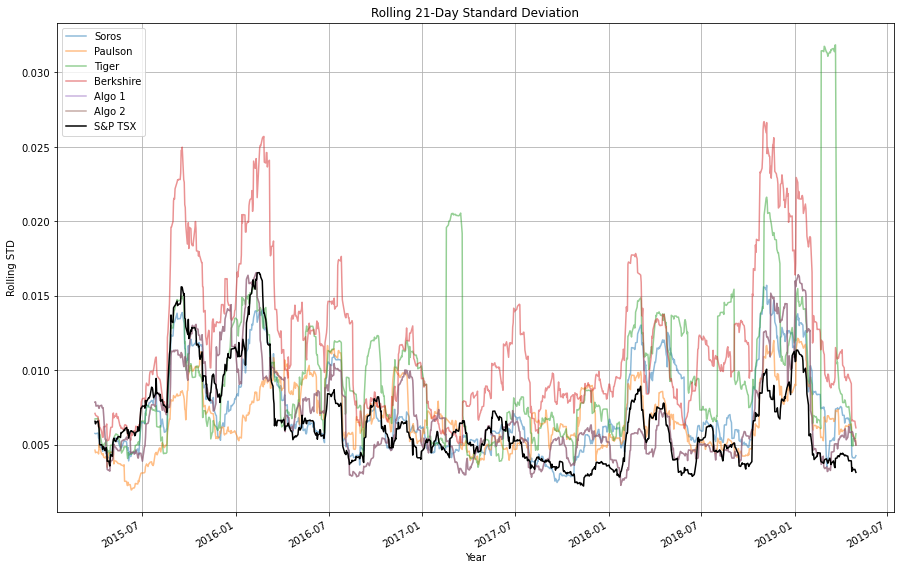

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
soros_rolling_std = portfolio_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=21).std()
paulson_rolling_std = portfolio_returns["PAULSON & CO.INC. "].rolling(window=21).std()
tiger_rolling_std = portfolio_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=21).std()
berkshire_rolling_std = portfolio_returns["BERKSHIRE HATHAWAY INC"].rolling(window=21).std()     
algo1_rolling_std = portfolio_returns["Algo 1"].rolling(window=21).std()       
algo2_rolling_std = portfolio_returns["Algo 2"].rolling(window=21).std()      
sp_tsx_rolling_std = portfolio_returns["S&P TSX"].rolling(window=21).std()   
                                          
# Plot all rolling std's together
rolling_std = soros_rolling_std.plot(figsize=(15, 10), title="Rolling 21-Day Standard Deviation", alpha=0.5)   
paulson_rolling_std.plot(ax=rolling_std, alpha=0.5)
tiger_rolling_std.plot(ax=rolling_std, alpha=0.5)
berkshire_rolling_std.plot(ax=rolling_std, alpha=0.5)
algo1_rolling_std.plot(ax=rolling_std, alpha=0.5)
algo1_rolling_std.plot(ax=rolling_std, alpha=0.5)
sp_tsx_rolling_std.plot(ax=rolling_std, color='k', grid=True)

rolling_std.legend(["Soros", "Paulson", "Tiger", "Berkshire", "Algo 1", "Algo 2", "S&P TSX"])
rolling_std.set_xlabel("Year")
rolling_std.set_ylabel("Rolling STD")


### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = portfolio_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.0000,0.6971,0.5610,0.7502,0.3138,0.8267,0.6739
PAULSON & CO.INC.,0.6971,1.0000,0.4330,0.5400,0.2664,0.6740,0.4865
TIGER GLOBAL MANAGEMENT LLC,0.5610,0.4330,1.0000,0.4235,0.1612,0.5067,0.4406
BERKSHIRE HATHAWAY INC,0.7502,0.5400,0.4235,1.0000,0.2894,0.6846,0.5573
Algo 1,0.3138,0.2664,0.1612,0.2894,1.0000,0.2855,0.3103
Algo 2,0.8267,0.6740,0.5067,0.6846,0.2855,1.0000,0.7374
S&P TSX,0.6739,0.4865,0.4406,0.5573,0.3103,0.7374,1.0000


<AxesSubplot:>

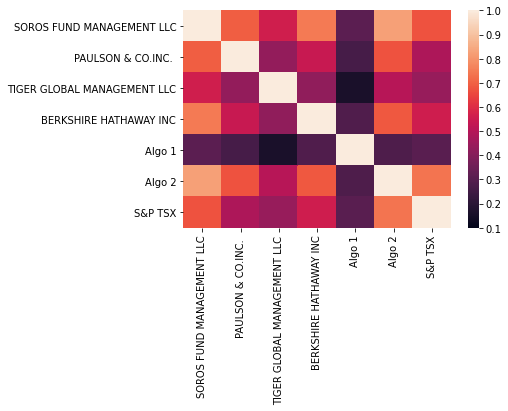

In [24]:
# Plot correlation using a seaborn heatmap
sns.heatmap(correlation, vmin=0.1, vmax=1)

## Analysis
Judging by the correlation heatmap, the portfolios that most closesely mimic the S&P TSX are Soros Fund Management and Algo 2

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 vs S&P TSX'}, xlabel='Date'>

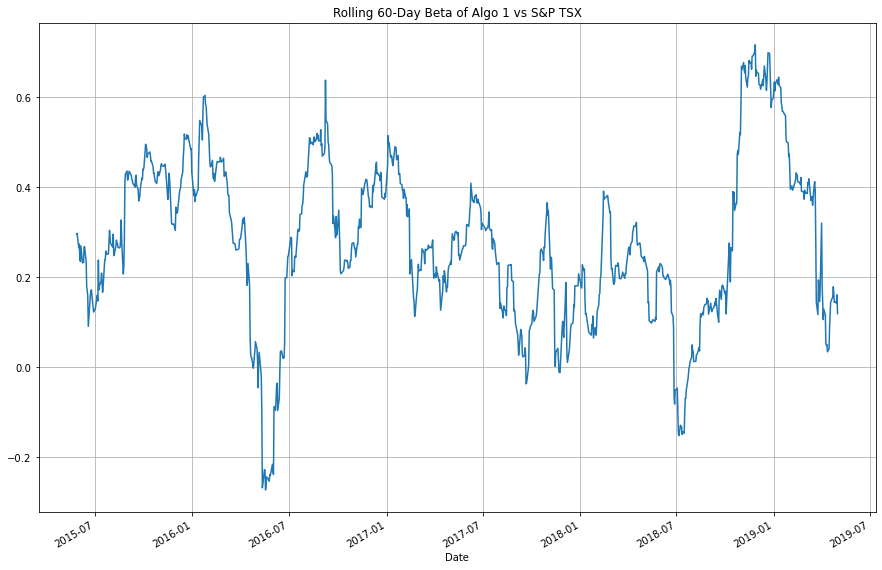

In [25]:
# Calculate covariance and 60-day rolling covariance of Algo 1
algo1_covariance = portfolio_returns["Algo 1"].cov(portfolio_returns["S&P TSX"])
algo1_rolling_covariance = portfolio_returns["Algo 1"].rolling(window=60).cov(portfolio_returns["S&P TSX"])

# Calculate variance and 60-day rolling variance of Algo 1 and S&P TSX
algo1_variance = portfolio_returns["Algo 1"].var()
sp_variance = portfolio_returns["S&P TSX"].var()
algo1_rolling_variance = portfolio_returns["Algo 1"].rolling(window=60).var()
sp_rolling_variance = portfolio_returns["S&P TSX"].rolling(window=60).var()

# Calculating beta and 60-day rolling beta of Algo 1
algo1_beta = algo1_covariance / sp_variance
algo1_rolling_beta = algo1_rolling_covariance / sp_rolling_variance

# Plot 60-day rolling beta of Algo 1 vs S&P TSX
algo1_rolling_beta.plot(figsize=(15, 10), title='Rolling 60-Day Beta of Algo 1 vs S&P TSX', grid=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'All Portfolios Exponentially Weighted Moving Average - 21 day half life'}, xlabel='Date'>

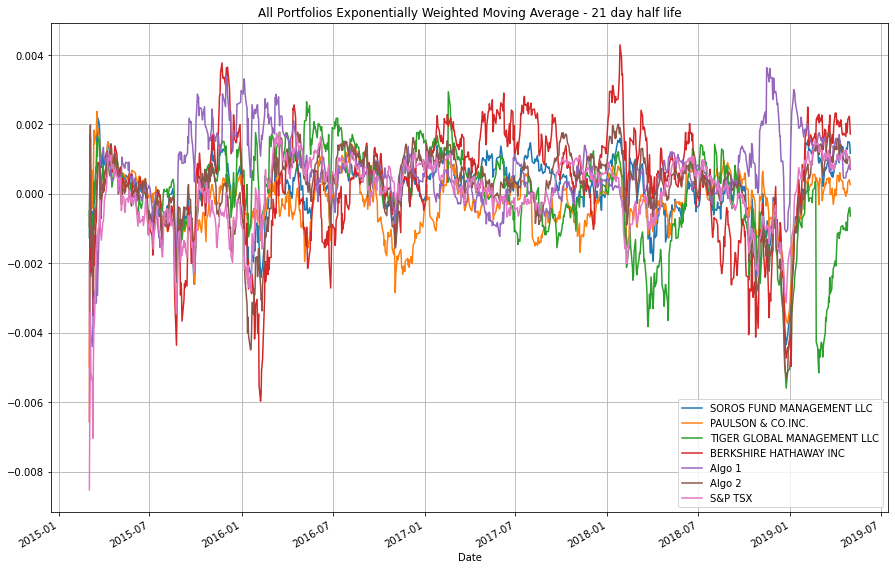

In [26]:
# Use `ewm` to calculate the rolling window
# Calculate the ewm mean of all portfolios and plot
portfolio_ewm = portfolio_returns.ewm(halflife=21).mean()
portfolio_ewm.plot(figsize=(15, 10), title='All Portfolios Exponentially Weighted Moving Average - 21 day half life', grid=True)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right? 

This is called Modern investment theory.

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
ann_sharpe_ratios = (portfolio_returns.mean() * 252) / ann_std
ann_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.2867
PAULSON & CO.INC.             -0.5476
TIGER GLOBAL MANAGEMENT LLC   -0.1445
BERKSHIRE HATHAWAY INC         0.4670
Algo 1                         1.4915
Algo 2                         0.3968
S&P TSX                        0.1956
dtype: float64

<AxesSubplot:title={'center':'Annualised Sharpe Ratio'}>

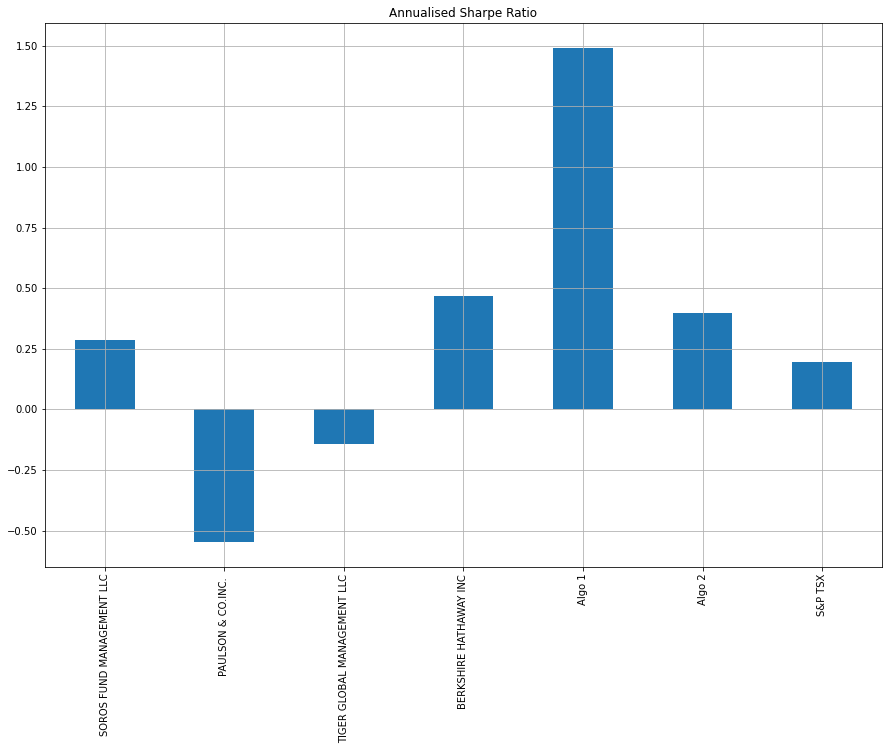

In [28]:
# Visualize the sharpe ratios as a bar plot
ann_sharpe_ratios.plot.bar(figsize=(15, 10), title="Annualised Sharpe Ratio", grid=True)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperformed every portfolio by a mile in terms of its risk vs reward ratio. Algo 2 falls slightly below the Berkshire Hathaway portfolio's risk to reward. Paulson and Tiger performed quite badly in the time period if you look at their cumulative returns in conjunction with their negative sharpe ratio's. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [29]:
# Create path for AGL
agl_path = Path("Resources/AGL.csv")

# Read brn_path
agl = pd.read_csv(agl_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
agl.sort_index(ascending=True)
agl.head()

,Close
Date,
2015-03-04,15.0700
2015-03-05,15.1400
2015-03-06,15.0600
2015-03-09,14.7300
2015-03-10,14.7100


In [30]:
# Create path for BHP
bhp_path = Path("Resources/BHP.csv")

# Read bhp_path
bhp = pd.read_csv(bhp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
bhp.sort_index(ascending=True)
bhp.head()

,Close
Date,
2015-03-04,31.1300
2015-03-05,30.9900
2015-03-06,30.5000
2015-03-09,30.0400
2015-03-10,29.8200


In [31]:
# Create path for A2M
a2m_path = Path("Resources/A2M.csv")

# Read ado_path
a2m = pd.read_csv(a2m_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
a2m.sort_index(ascending=True)
a2m.head()

,Close
Date,
2015-03-31,0.5600
2015-04-01,0.5600
2015-04-02,0.5600
2015-04-07,0.5500
2015-04-08,0.5400


In [32]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([agl, bhp, a2m], axis="columns", join="inner")
my_portfolio.head()

,Close,Close,Close
Date,,,
2015-03-31,15.2000,29.0000,0.5600
2015-04-01,15.0900,28.3500,0.5600
2015-04-02,15.1200,28.2400,0.5600
2015-04-07,15.2000,28.4500,0.5500
2015-04-08,15.0400,28.7200,0.5400


In [33]:
# Set column names to corresponding ticker
my_portfolio.columns = (["AGL", "BHP", "A2M"])
my_portfolio.head()


,AGL,BHP,A2M
Date,,,
2015-03-31,15.2000,29.0000,0.5600
2015-04-01,15.0900,28.3500,0.5600
2015-04-02,15.1200,28.2400,0.5600
2015-04-07,15.2000,28.4500,0.5500
2015-04-08,15.0400,28.7200,0.5400


In [34]:
# Calculate daily returns
my_portfolio = my_portfolio.pct_change()

# Drop NAs
my_portfolio.dropna(inplace=True)

# Display sample data
my_portfolio.head()

,AGL,BHP,A2M
Date,,,
2015-04-01,-0.0072,-0.0224,0.0000
2015-04-02,0.0020,-0.0039,0.0000
2015-04-07,0.0053,0.0074,-0.0179
2015-04-08,-0.0105,0.0095,-0.0182
2015-04-09,-0.0027,-0.0178,0.0000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_portfolio.dot(weights)

# Display sample data
my_portfolio_returns.head()

Date
2015-04-01   -0.0099
2015-04-02   -0.0006
2015-04-07   -0.0017
2015-04-08   -0.0064
2015-04-09   -0.0068
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
new_portfolio_returns = pd.concat([portfolio_returns, my_portfolio_returns], axis="columns", join="inner")
new_portfolio_returns.columns = (["Soros", "Paulson", "Tiger", "Berkshire", "Algo 1", "Algo 2", "S&P TSX", "My Portfolio"])
new_portfolio_returns


,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2015-04-01,0.0009,0.0002,-0.0020,-0.0039,-0.0030,0.0030,0.0027,-0.0099
2015-04-02,0.0026,0.0043,0.0031,0.0020,0.0009,0.0049,0.0056,-0.0006
2015-04-07,-0.0012,-0.0002,-0.0021,0.0019,0.0020,-0.0026,0.0058,-0.0017
2015-04-08,0.0062,0.0127,0.0035,0.0124,0.0064,0.0037,0.0016,-0.0064
2015-04-09,0.0040,0.0032,-0.0005,-0.0019,-0.0055,-0.0013,0.0074,-0.0068
...,...,...,...,...,...,...,...,...
2019-04-24,0.0023,0.0010,-0.0040,-0.0064,0.0011,0.0004,-0.0050,0.0114
2019-04-26,0.0081,0.0092,0.0124,0.0104,0.0030,0.0053,0.0023,0.0040
2019-04-29,0.0013,0.0027,0.0063,0.0052,0.0052,0.0028,-0.0008,0.0065


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_portfolio_returns.isnull().sum()

Soros           0
Paulson         0
Tiger           0
Berkshire       0
Algo 1          0
Algo 2          0
S&P TSX         0
My Portfolio    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
new_ann_std = new_portfolio_returns.std() * np.sqrt(252)
new_ann_std

Soros          0.1244
Paulson        0.1116
Tiger          0.1740
Berkshire      0.2058
Algo 1         0.1206
Algo 2         0.1326
S&P TSX        0.1118
My Portfolio   0.2322
dtype: float64

### Calculate and plot rolling `std` with 21-day window

Text(0, 0.5, 'Rolling STD')

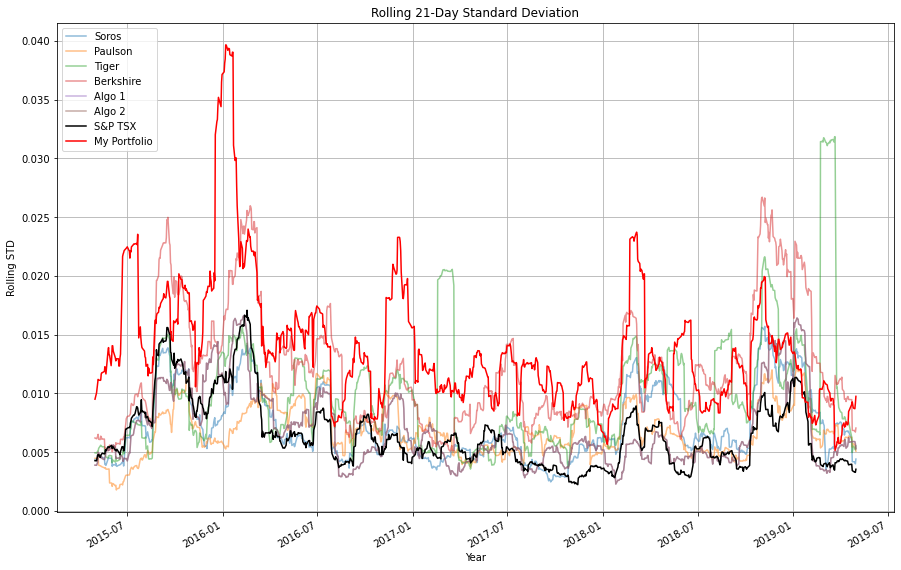

In [39]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
soros_rolling_std = new_portfolio_returns["Soros"].rolling(window=21).std()
paulson_rolling_std = new_portfolio_returns["Paulson"].rolling(window=21).std()
tiger_rolling_std = new_portfolio_returns["Tiger"].rolling(window=21).std()
berkshire_rolling_std = new_portfolio_returns["Berkshire"].rolling(window=21).std()     
algo1_rolling_std = new_portfolio_returns["Algo 1"].rolling(window=21).std()       
algo2_rolling_std = new_portfolio_returns["Algo 2"].rolling(window=21).std()      
sp_tsx_rolling_std = new_portfolio_returns["S&P TSX"].rolling(window=21).std()
my_rolling_std = new_portfolio_returns["My Portfolio"].rolling(window=21).std()   

                                          
# Plot all rolling std's together
rolling_std = soros_rolling_std.plot(figsize=(15, 10), title="Rolling 21-Day Standard Deviation", alpha=0.5)   
paulson_rolling_std.plot(ax=rolling_std, alpha=0.5)
tiger_rolling_std.plot(ax=rolling_std, alpha=0.5)
berkshire_rolling_std.plot(ax=rolling_std, alpha=0.5)
algo1_rolling_std.plot(ax=rolling_std, alpha=0.5)
algo1_rolling_std.plot(ax=rolling_std, alpha=0.5)
sp_tsx_rolling_std.plot(ax=rolling_std, color="k")
my_rolling_std.plot(ax=rolling_std, color="red", grid=True)

rolling_std.legend(["Soros", "Paulson", "Tiger", "Berkshire", "Algo 1", "Algo 2", "S&P TSX", "My Portfolio"])
rolling_std.set_xlabel("Year")
rolling_std.set_ylabel("Rolling STD")


### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation
correlation = new_portfolio_returns.corr()
correlation

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P TSX,My Portfolio
Soros,1.0000,0.6958,0.5537,0.7514,0.3189,0.8267,0.6713,0.1454
Paulson,0.6958,1.0000,0.4281,0.5375,0.2757,0.6715,0.4839,0.1034
Tiger,0.5537,0.4281,1.0000,0.4221,0.1586,0.4995,0.4343,0.0633
Berkshire,0.7514,0.5375,0.4221,1.0000,0.2973,0.6842,0.5574,0.1088
Algo 1,0.3189,0.2757,0.1586,0.2973,1.0000,0.2927,0.3136,0.0790
Algo 2,0.8267,0.6715,0.4995,0.6842,0.2927,1.0000,0.7373,0.1662
S&P TSX,0.6713,0.4839,0.4343,0.5574,0.3136,0.7373,1.0000,0.2086
My Portfolio,0.1454,0.1034,0.0633,0.1088,0.0790,0.1662,0.2086,1.0000


<AxesSubplot:>

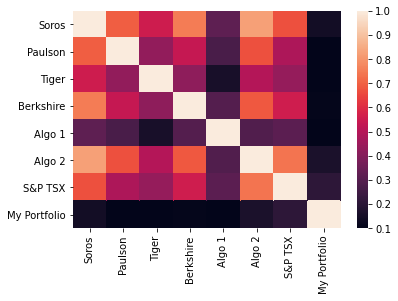

In [41]:
# Use seaborn to plot a heatmap of the correlation
sns.heatmap(correlation, vmin=0.1, vmax=1)

## Analysis
It seems as though the tickers I have chosen for my custom portfolio are extremely negatively correlated to all other portfolios in the dataframe. Interestingly, its closest correlation is to the S&P TSX with a score of 0.2

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'60-day Rolling Beta of my Portfolio'}, xlabel='Date'>

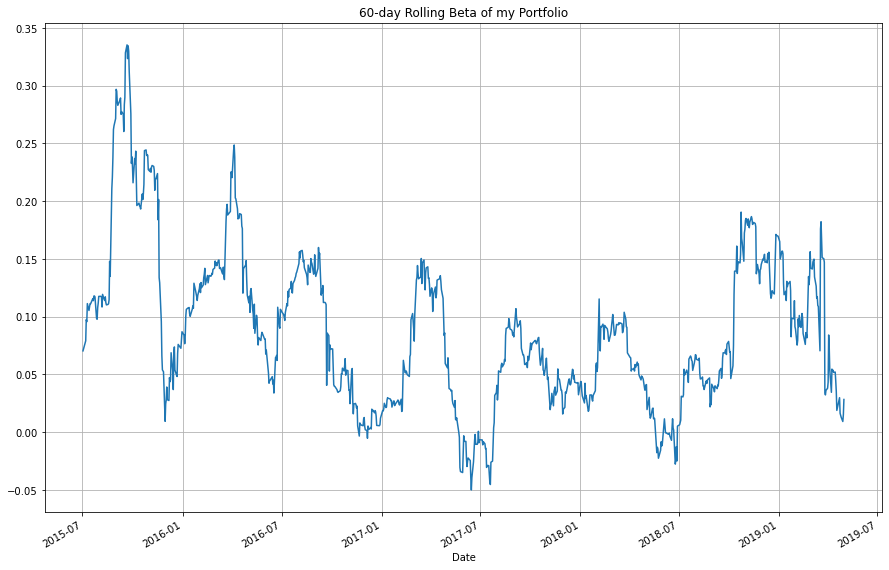

In [42]:
# Calculate the covariance and rolling covariance of my portfolio
my_portfolio_covariance = new_portfolio_returns["My Portfolio"].cov(new_portfolio_returns["S&P TSX"])
my_portfolio_rolling_covariance = new_portfolio_returns["My Portfolio"].rolling(window=60).cov(new_portfolio_returns["S&P TSX"])

# Calculate the variance and rolling variance of my portfolio
my_portfolio_variance = new_portfolio_returns["My Portfolio"].var()
my_portfolio_rolling_variance = new_portfolio_returns["My Portfolio"].rolling(window=60).var()

# Calculate the beta and rolling beta of my portfolio
my_portfolio_beta = my_portfolio_covariance / my_portfolio_variance
my_portfolio_rolling_beta = my_portfolio_rolling_covariance / my_portfolio_rolling_variance

# Plot the 60-day rolling beta of my portfolio
my_portfolio_rolling_beta.plot(figsize=(15, 10), title="60-day Rolling Beta of my Portfolio", grid=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualzied Sharpe Ratios
new_ann_sharpe_ratios = (new_portfolio_returns.mean() * 252) / new_ann_std
new_ann_sharpe_ratios

Soros           0.2677
Paulson        -0.5032
Tiger          -0.1962
Berkshire       0.4816
Algo 1          1.5360
Algo 2          0.4222
S&P TSX         0.2676
My Portfolio    1.7024
dtype: float64

<AxesSubplot:>

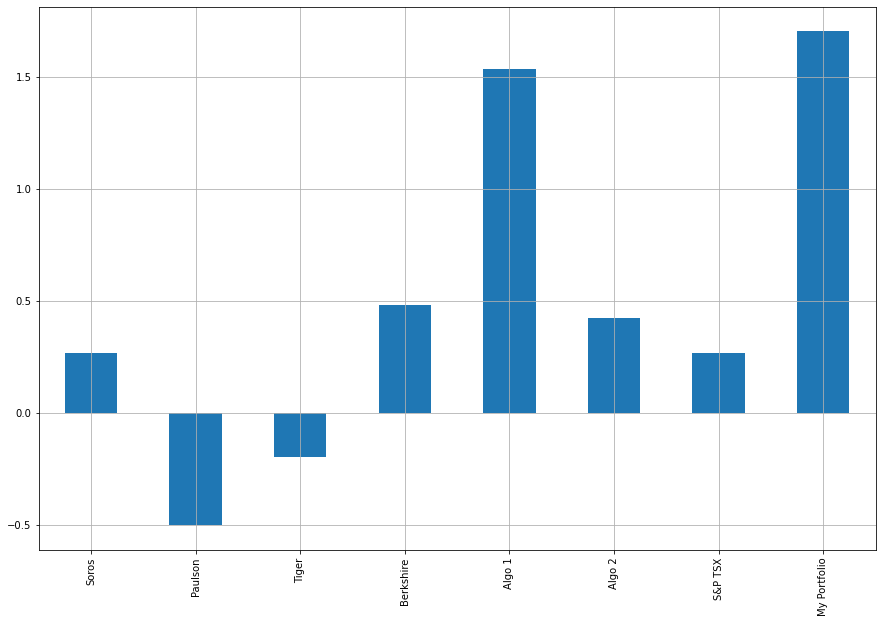

In [44]:
# Visualize the sharpe ratios as a bar plot
new_ann_sharpe_ratios.plot.bar(figsize=(15,10), grid=True)

<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

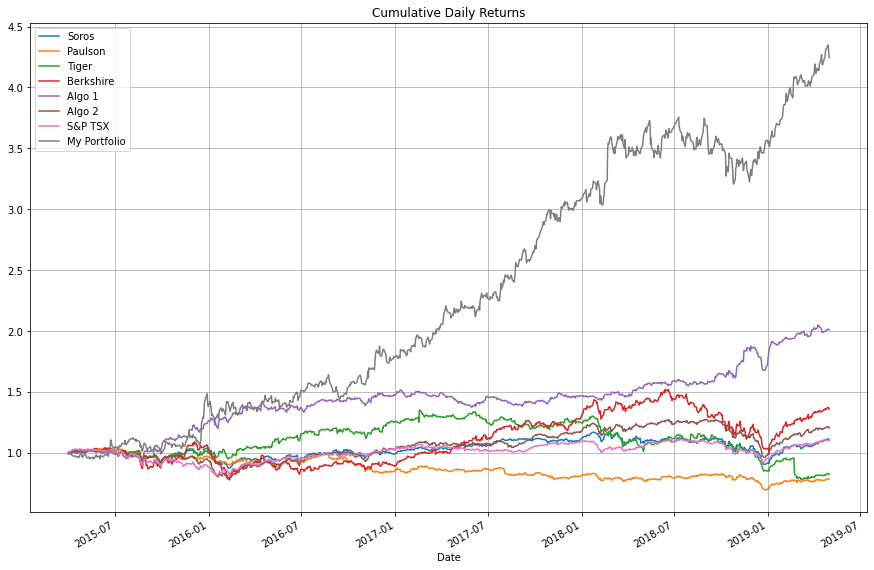

In [45]:
# Calculate and plot cumulative returns for the new_portfolio_returns
new_cumulative_returns = (1 + new_portfolio_returns).cumprod()
new_cumulative_returns.plot(figsize=(15, 10), title="Cumulative Daily Returns", grid=True)

### How does your portfolio do?
----
#### Reflection statement

I'll start off by saying this was a very interesting assignment. It's really nice to see what we have learned in class coming together to create a real world use case that I would actually use. I chose to do all of the exercises from the week, before I started the assignment, which I think was a great idea. By the time I got to the assignment I didn't feel intimidated by it and I realised that it was just using everything we'd already learnt in the past two weeks, in conjunction.

I feel like using these analysis techniques on real information that is pertinent to myself, was a great way of reinforcing the learning.

For the custom portfolio I attempted it a couple of times with stocks that I hold which didn't work out because of big gaps in the daily closing prices. It made the graphs look bad with straight lines connecting the time periods that didn't exist.

I ended up just choosing some stocks that I know a little about, with no idea how they actually performed over that 4 year period. I had no idea how well they actually did compared to all of these big funds. HODL > Day trading perhaps?

#### Custom Portfolio Analysis

My portfolio:

- Had a higher than most annualised standard deviation at 0.2322, followed closely behind by Berkshire Hathaway           at 0.2058. This indicates that it is more volatile than the other portfolios.
- Is very negatively correlated to all other portfolios, with the highest correlation to the S&P TSX with a               score of 0.2086. This contributes to why my portfolio had over two times the returns over the time period than         any other portfolio.
- Had the highest beta score of all the portfolios, only just beating that of the Algo 1 portfolio, although             both of which had three times better beta scores than any other portfolio
- Had the highest overall returns of any portfolio for the time period, by a whopping 225%
           

One side note; I realise that these charts are comparing the US portfolios with my portfolio which is denominated in AUD, and therefore the returns weren't as good as the charts indicate. They are more realistically 20% higher than they should be in comparison.
    
If the S&P TSX is a sufficient benchmark for the US Markets, it would be interesting to plot out all of these financial metrics again, comparing the S&P with the ASX 50 to see how the performed against each other over this time period. Maybe the Australian markets were doing much better in general in that period.
    
